In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('questions.csv')

In [3]:
df.shape

(404351, 6)

In [32]:
new_df = df.sample(50000,random_state=2)

In [33]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 339499 to 355911
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [35]:
new_df.duplicated().sum()

0

In [36]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [37]:
(new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100

is_duplicate
0    63.188
1    36.812
Name: count, dtype: float64

In [38]:
qid = pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print("Unique Questions: ",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Repeated Questions: ",x[x].shape[0])

Unique Questions:  99520
Repeated Questions:  415


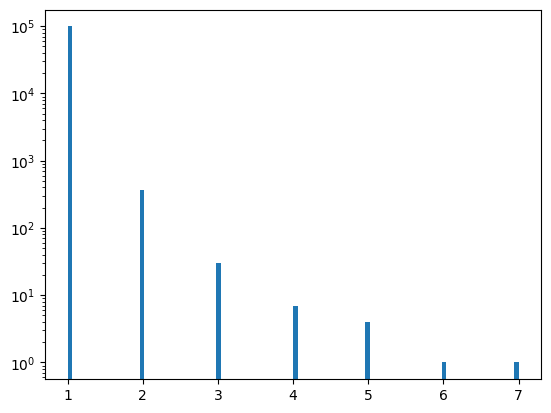

In [39]:
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [40]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)

ques = list(ques_df['question1']) + list(ques_df['question2'])

ques1 , ques2 = np.vsplit(cv.fit_transform(ques).toarray(),2)

In [48]:
temp_df1 = pd.DataFrame(ques1,index=ques_df.index)
temp_df2 = pd.DataFrame(ques2,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape


(50000, 6000)

In [49]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [51]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
339499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
289521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
132566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
368660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7574

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7398